In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## The SD and Bell Shaped Curves

In [3]:
births = Table.read_table('baby.csv')

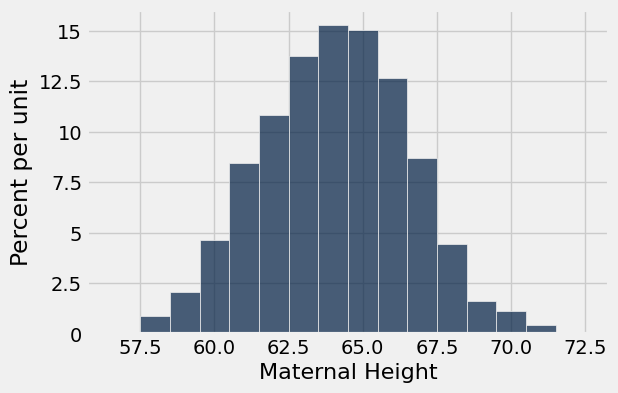

In [4]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [ ]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

In [ ]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

## Central Limit Theorem ##

In [ ]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united

In [ ]:
united.hist('Delay', bins=united_bins)

In [ ]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

In [ ]:
percentile(50, delays)

In [ ]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [ ]:
one_sample_mean(100)

In [ ]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [ ]:
sample_means_100 = ten_thousand_sample_means(100)

In [ ]:
sample_means_100

In [ ]:
len(sample_means_100)

In [ ]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', delay_mean)